# Worksheet 11: Introduction to Explanatory Modeling when the Response Variable is Categorical or Discrete Counts

#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1. Describe the logistic regression estimation procedure (categorical data as the response variable and explanatory variables), and Poisson regression estimation procedure (discrete counts as the response variable and explanatory variables).
2. Discuss the relationship between linear regression and logistic and Poisson regression. Discuss the consequences of modeling data that is more suitable for logistic and Poisson regression models as a linear regression model.
3. Interpret the coefficients and $p$-values in the logistic and Poisson regression settings.
4. Discuss useful diagnostics for logistic and Poisson regression and explain why they should be performed.
5. Write a computer script to perform logistic and Poisson regression and perform model diagnostics. Interpret and communicate the results from that computer script.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(mlbench)
library(AER)
library(ISLR)
library(broom)
library(qqplotr)
library(performance)
library(see)
library(MASS)
library(glmbb)
library(cowplot)
source("tests_worksheet_12.R")

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loadi

Error in get(genname, envir = envir) : object 'testthat_print' not found



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




## 1. Intro

In previous week, you explored the Multiple Linear Regression (MLR) as a way to model the mean of a numeric response variable, $Y$, given a set of covariate $\mathbf{X}$:

$$
E\left[Y\left|\mathbf{X}=\left(X_1,...,X_p\right)\right.\right] = \beta_0 + \beta_1X_1 + \ldots + \beta_pX_p
$$

However, in some situations, the MLR is not suitable. This week we are going to study two of those situations that commonly arises in practice:

- the case of dichotomous variables (e.g., yes/no, success/failure, win/lose, sick/not sick); 
- the case of counts (e.g., number of cases of a rare disease in Vancouver in a period of one year; the number of accidents in the Canada Highway in a period of one month;)

## 1. Logistic Regression



The first section of this worksheet will focus on the dataset `Default` from [*An Introduction to Statistical Learning*](https://www.statlearning.com/) (James et al., 2013). This is a dataset of $n = 10,000$ observations with the following variables:

- `default`: a binary response indicating whether the customer defaulted on their debt (`Yes` or `No`).
- `student`: a binary input variable indicating whether the customer is a student (`Yes` or `No`).
- `balance`: a continuous input variable indicating the remaining average balance of the customer's credit card (after the monthly payment).
- `income`: a continuous input variable indicating the customer's income.

In [2]:
head(Default)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


**Question 1.0**
<br>{points: 1}

We want to assess whether the response `default` is statistically associated to the input variables `student`, `balance`, and `income`. We have to set our binary response $Y_i$ mathematically as:

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th customer is in default},\\
0 \; \; \; \; 	\mbox{otherwise.}
\end{cases}
$$

Note that the "$1$" category is referred as *success*. Moreover, each $Y_i$ is a Bernoulli trial whose probability of success is $p_i$, i.e., 

$$Y_i \sim \text{Bernoulli}(p_i).$$

In the  `default` column, replace the levels `Yes` and `No` with the numerical values `1` and `0`, respectively.

In [3]:
# Default <- 
#     Default %>% 
#     ...(... = ...(..., 1, 0))

### BEGIN SOLUTION
Default <- 
    Default %>% 
    mutate(default = if_else(default == "Yes", 1, 0))
### END SOLUTION

head(Default)

,default,student,balance,income
,<dbl>,<fct>,<dbl>,<dbl>
1,0,No,729.5265,44361.625
2,0,Yes,817.1804,12106.135
3,0,No,1073.5492,31767.139
4,0,No,529.2506,35704.494
5,0,No,785.6559,38463.496
6,0,Yes,919.5885,7491.559


In [4]:
test_1.0()

[1] "Success!"


**Question 1.1**
<br>{points: 1}

Firstly, suppose we use the `1`s and `0`s in the response `default` as probabilities and we estimate a ordinary simple linear regression (SLR) to predict the mean of $Y_i$ (i.e., $p_i)$ subject to the continuous input `balance`:

$$
\mathbb{E}(Y_i \mid X_{\textit{i,balance}}) = p_i = \beta_0 + \beta_1 X_{\textit{i,balance}}.
$$

Create a plot of the data (using `geom_point()`) along with the estimated regression line (using `geom_smooth()` with `method = "lm"`). Include proper axis labels. The `ggplot()` object's name will be `Default_SLR_plot`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

`geom_smooth()` using formula 'y ~ x'



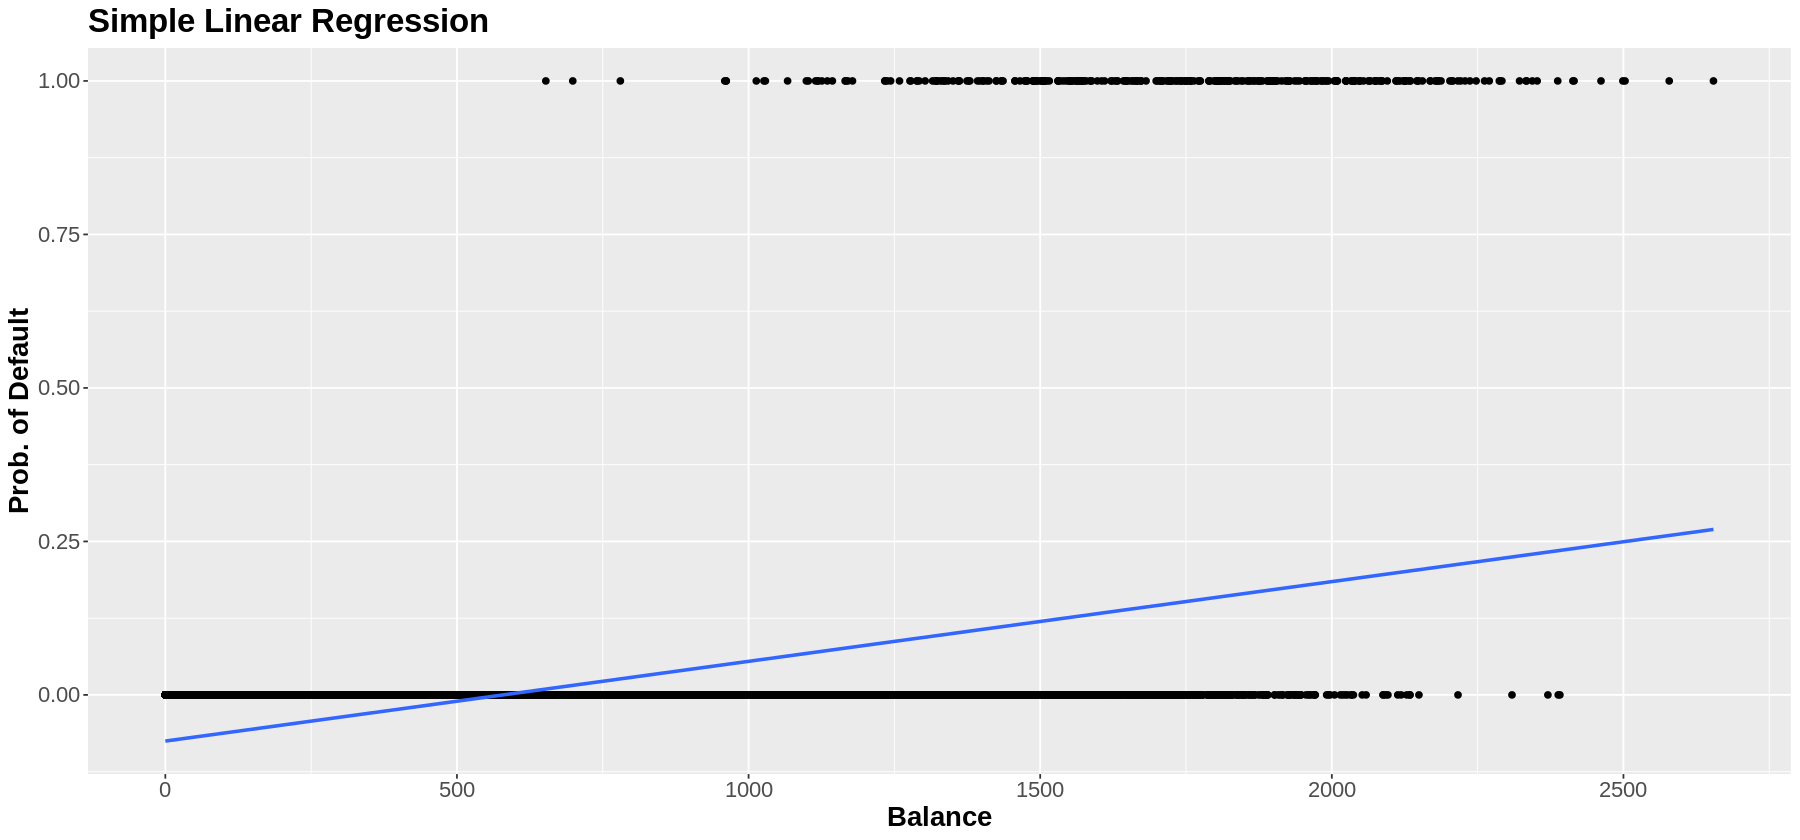

In [5]:
options(repr.plot.width = 15, repr.plot.height = 7) # Adjust these numbers so the plot looks good in your desktop.

# Default_SLR_plot <- ...(...) +
#   ...(aes(..., ...)) +
#   ...(aes(..., ...), method = ..., se = FALSE) +
#   labs(y = ..., x = ...) +
#   ggtitle(...) +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold"),
#     legend.title = element_text(face = "bold")) +
#   scale_x_continuous(breaks = seq(0, 2500, 500))


### BEGIN SOLUTION
Default_SLR_plot <- ggplot(Default) +
  geom_point(aes(balance, default)) +
  geom_smooth(aes(balance, default), method = "lm", se = FALSE) +
  labs(y = "Prob. of Default", x = "Balance") +
  ggtitle("Simple Linear Regression") +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  ) +
  scale_x_continuous(breaks = seq(0, 2500, 500))
### END SOLUTION

Default_SLR_plot

In [6]:
test_1.1()

[1] "Success!"


**Class Discussion:** 

Do you see any problems with our model?  

**Question 1.2**
<br>{points: 1}

To overcome the restrticted range problem, instead of using the linear model to estimate $p_i$ directly, i.e.,  

$$\mathbb{E}(Y_i|X_{\textit{i,balance}}) = p_i = \beta_0 + \beta_1X_{i,\textit{balance}},$$ 

we could use a curve that is always between $[0,1]$. One of such curves is the logistic curve:

$$\mathbb{E}(Y_i|X_{\textit{i,balance}}) = p_i = \frac{\exp{\left\{\beta_0 + \beta_1X_{\textit{i,balance}}\right\}}}{1+\exp{\left\{\beta_0 + \beta_1X_{\textit{i,balance}}\right\}}}$$ 

Let's see how the logistic curve looks like. In this exercise, you are going to plot the logistic curve to see how it behaves.

_Save the plot in an object named `logistic_curve`._

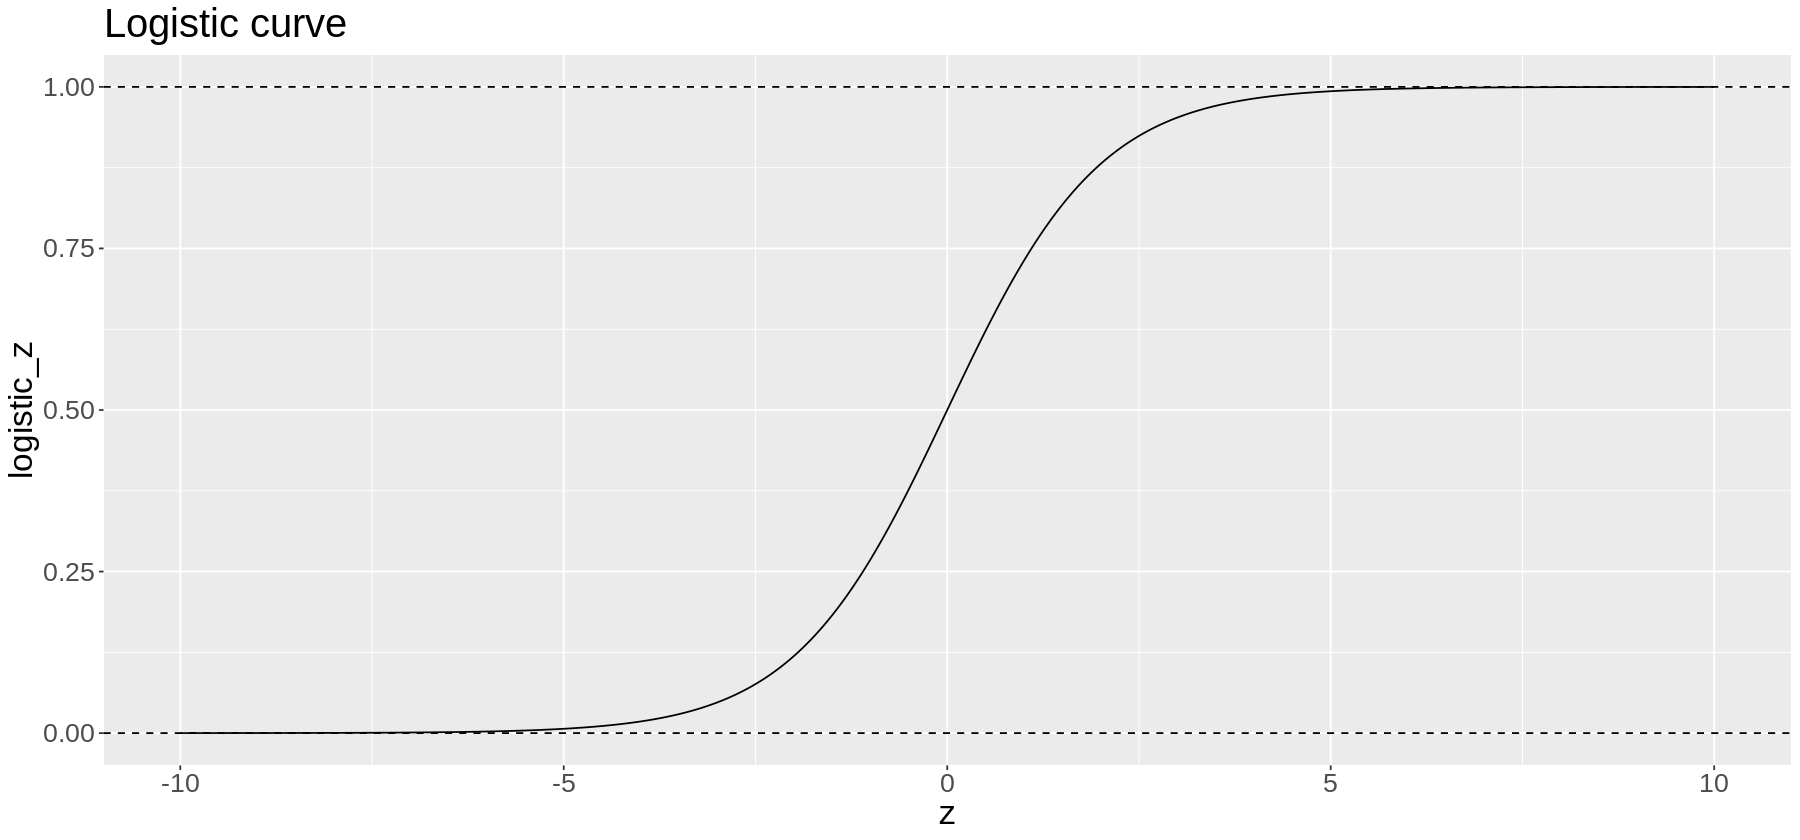

In [7]:
# logistic_curve <-
#     tibble(z = seq(-10,10,0.01),
#            logistic_z = ...) %>% 
#     ggplot(aes(z, ...)) + 
#     geom_line() +
#     geom_hline(yintercept = 1, lty=2) + 
#     geom_hline(yintercept = 0, lty=2) +
#     theme(text = element_text(size = 20)) + 
#     ggtitle("Logistic curve")

### BEGIN SOLUTION
logistic_curve <-
    tibble(z = seq(-10,10,0.01),
           logistic_z = exp(z)/(1+exp(z))) %>% 
    ggplot(aes(z, logistic_z)) + 
    geom_line() +
    geom_hline(yintercept = 1, lty=2) + 
    geom_hline(yintercept = 0, lty=2) +
    theme(text = element_text(size = 20)) +
    ggtitle("Logistic curve")
### END SOLUTION

logistic_curve

In [8]:
test_1.2()

[1] "Success!"


**Question 1.3: Understanding the odds**
<br>{points: 1}

By using the logistic curve to model the probability of the response given the covarites, in this case, 

$$\mathbb{E}(Y_i|X_{\texttt{balance}_i}) = p_i = \frac{\exp{\left\{\beta_0 + \beta_1X_{\texttt{balance}_i}\right\}}}{1+\exp{\left\{\beta_0 + \beta_1X_{\texttt{balance}_i}\right\}}}$$ 

instead of using $\beta_0 + \beta_1X_{\texttt{balance}_i}$ to predict $p_i$ directly, we are using it to predict 

\begin{equation*}
\log\left(\frac{p_i}{1 - p_i}\right) = \beta_0 + \beta_1 X_{\texttt{balance}_i}.
\end{equation*}

The function $\log\left(\frac{p_i}{1 - p_i}\right)$ is called `logit`, and it is *logarithm of the odds*. Answer the question below:

> Vancouver Canucks is playing against Calgary Flames in the Final of NHL. The match will be at Rogers' arena, Canucks home. It is expected that out of 18,910 seats in the arena, 13700 seats will be occupied by Canucks fans. During the match, prizes are randomly distributed among the seats. What are the odds that a Canucks fan wins a given prize? 

Assign your answer to an object named `answer1.3`.

In [9]:
#answer1.3 <- ...

### BEGIN SOLUTION
answer1.3 <- 13700/(18910-13700)
### END SOLUTION

answer1.3

[1] 2.629559

In [10]:
test_1.3()

[1] "Success!"


**Question 1.4:**
<br>{points: 1}

Let us plot the predictions of the binary logistic regression model on top of `Default_SLR_plot`. Use `geom_smooth()` with `method = "glm"` and `method.args = c(family = binomial)`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



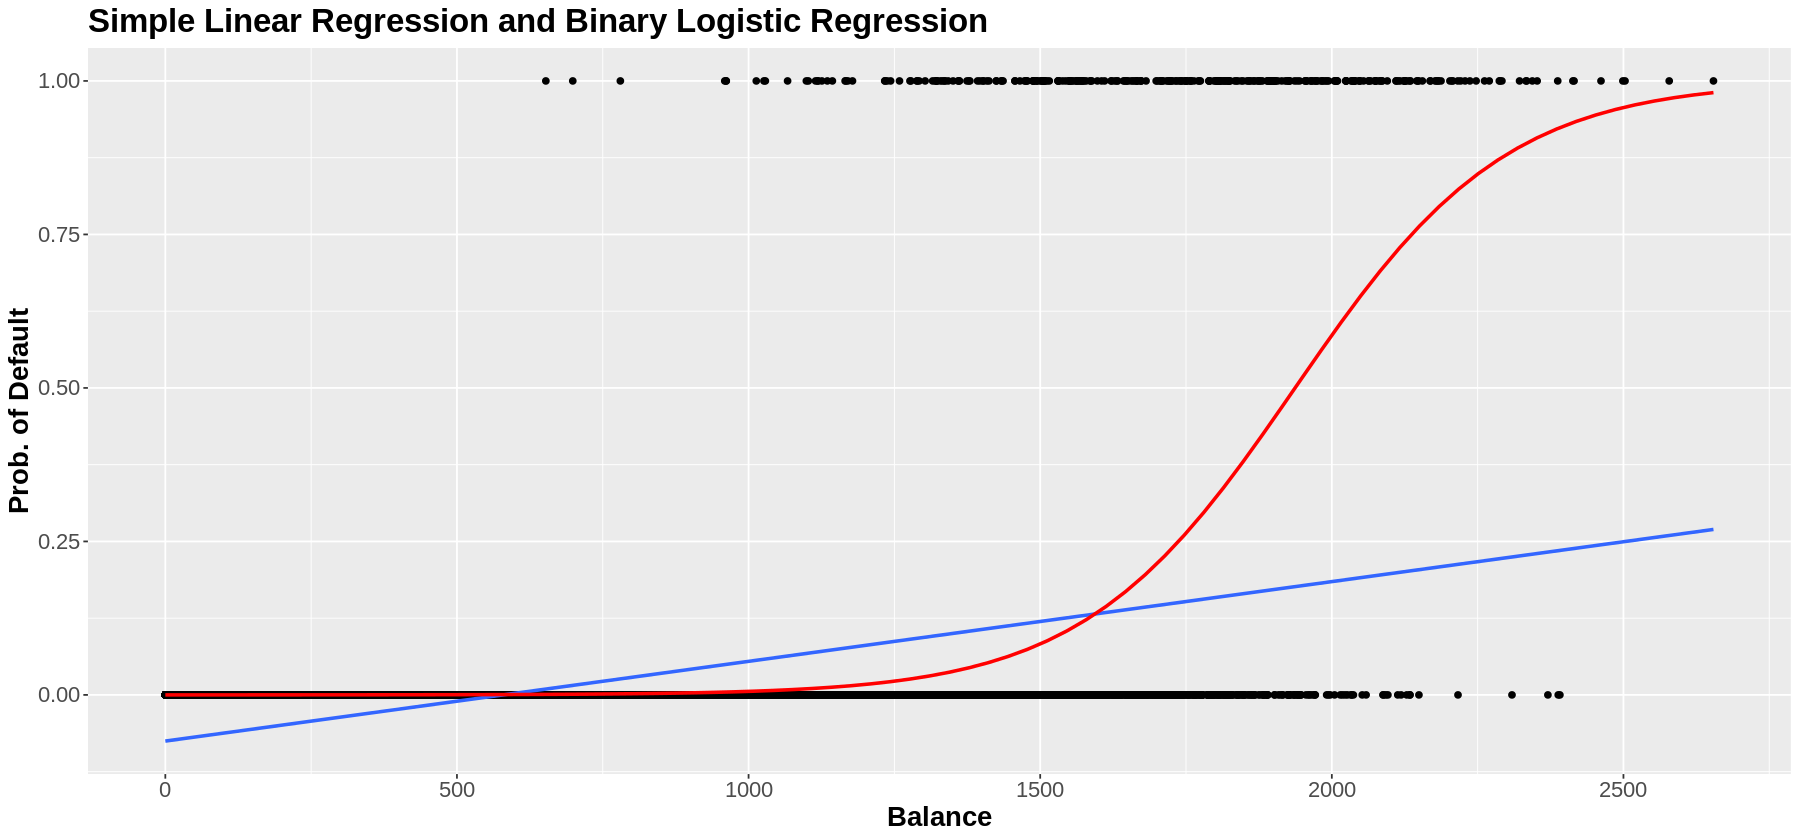

In [11]:
# Default_SLR_plot <- 
#     Default_SLR_plot +
#     ...(aes(..., ...),
#         ...,
#         ..., se = FALSE, color = "red") +
#     ggtitle("Simple Linear Regression and Binary Logistic Regression")

### BEGIN SOLUTION
Default_SLR_plot <- 
    Default_SLR_plot +
    geom_smooth(aes(balance, default),
                method = "glm",
                method.args = c(family = binomial), se = FALSE, color = "red") +
  ggtitle("Simple Linear Regression and Binary Logistic Regression")
### END SOLUTION

Default_SLR_plot

In [12]:
test_1.4()

[1] "Success!"


Much better, isn't? 

--------------------------

Ok, let's review our model!

In this case, we have that 

$$
Y_i =
\begin{cases}
1 \; \; \; \; \mbox{if the $i$th customer is in default},\\
0 \; \; \; \; 	\mbox{otherwise.}
\end{cases}
$$

As the response variable can only take the values $0$ or $1$, the key parameter becomes the probability that $Y_i$ takes on the value of $1$, i.e. the probability that the customer is in default, denoted as $p_i$. Hence:

$$\left.Y_i\right|X_{i, \textit{student}}, X_{i, \textit{balance}}, X_{i, \textit{income}} \sim \text{Bernoulli}(p_i).$$

The binary logistic regression models the probability $p_i$ given some contextual information (i.e., our covariates). To re-express $p_i$ on an unrestricted scale, the modelling is done in terms of the logit function:

$$
\mbox{logit}(p_i) = \log \bigg( \frac{p_i}{1 - p_i}\bigg) = \beta_0 + \beta_1 X_{i, \textit{student}} + \beta_2 X_{i, \textit{balance}} + \beta_{3} X_{i, \textit{income}},
$$

or equivalently

$$
p_i = \frac{\exp\big[\beta_0 + \beta_1 X_{i, \textit{student}} + \beta_2 X_{i, \textit{balance}} + \beta_{3} X_{i, \textit{income}}\big]}{1 + \exp\big[\beta_0 + \beta_1 X_{i, \textit{student}} + \beta_2 X_{i, \textit{balance}} + \beta_{3} X_{i, \textit{income}}\big]}.
$$

The response in this GLM is called the log-odds, the logarithm of the odds $p_i/(1 - p_i)$, the ratio of the probability of the event to the probability of the non-event. For instance, if the event is that the customer is in the default, it denotes how likely the $i$th customer is to be in default compared to how unlikely it is. 


The question now is, how do we estimate the coefficients $\beta_0, \beta_1, \beta_2,$ and, $\beta_3$? So far, in the case of linear regression, we have been using the Least Square Estimators. However, we won't be using least square this week. We are going to use a method called Maximum Likelihood Estimators (MLE). Details of MLE are outside the scope of this course. Luckily for us, R can assist us with that! 

**Question 1.5: Estimation**
<br>{points: 1}

In order to fit the model, we can use the function `glm()` and its argument `family = binomial` (required to specify the binary nature of the response). Let us use the function `glm()` to estimate a binary logistic regression. Using `Default`, we will fit a binary logistic model with `default` as the response and `student`, `balance`, and `income` as input variables.
    
Store the model in an object named `Default_binary_log_model`. The `glm()` parameters are analogous to `lm()` (`formula` and `data`) with the addition of `family = binomial` for this specific model. 

In [13]:
# Default_binary_log_model <- 
#   ...(
#        ...,
#        ...,
#        ...)


### BEGIN SOLUTION
Default_binary_log_model <- 
    glm(
        formula = default ~ student + balance + income,
        data = Default,
        family = binomial)
### END SOLUTION

summary(Default_binary_log_model)


Call:
glm(formula = default ~ student + balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


In [14]:
test_1.5()

[1] "Success!"




--------------------------

We could make inference with our binary logistic regression model, i.e., we can determine whether an input variable is statistically associated with the logarithm of the odds through hypothesis testing for the parameters $\beta_j$. Hence, we will need information about the estimated regression coefficient $\hat{\beta}_j$ and its corresponding variability, which is reflected in the standard error of the estimate, $\mbox{SE}\left(\hat{\beta}_j\right)$. 

To determine the statistical significance of the regression coefficient, you can use the Wald statistic $z_j$

$$z_j = \frac{\hat{\beta}_j}{\mbox{SE}\left(\hat{\beta}_j\right)}$$

to test the hypotheses
\begin{gather*}
H_0: \beta_j = 0\\
H_a: \beta_j \neq 0.
\end{gather*}

A statistic like $z_j$ is referred to as a $t$-value in ordinary linear regression. However, in binary logistic regression, provided the sample size $n$ is large enough, $z_j$ has an approximately standard normal distribution under $H_0$ rather than a $t$-distribution.

Furthermore, given a specified level of confidence, we can construct approximate $(1 - \alpha) \times 100\%$ confidence intervals for the corresponding true value of $\beta_j$:

$$\hat{\beta}_j \pm z_{\alpha/2}\mbox{SE}\left(\hat{\beta}_j\right),$$

where $z_{\alpha/2}$ is the upper $\alpha/2$ quantile of the standard normal distribution.

**Question 1.6: Inference**
<br>{points: 1}

Report the estimated coefficients, their standard errors, and corresponding $p$-values by calling `tidy()` on `Default_binary_log_model`. Include the corresponding asymptotic 95% confidence intervals. 

_Store the results in the variable `Default_binary_log_model_results`._

In [15]:
# Default_binary_log_model_results <- 
#   ...(..., conf.int = TRUE) 

### BEGIN SOLUTION
Default_binary_log_model_results <- 
    tidy(Default_binary_log_model, conf.int = TRUE) 
### END SOLUTION

Default_binary_log_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.086905e+01,4.922555e-01,-22.080088,4.911280e-108,-1.185902e+01,-9.928174e+00
studentYes,-6.467758e-01,2.362525e-01,-2.737646,6.188063e-03,-1.109018e+00,-1.822147e-01
balance,5.736505e-03,2.318945e-04,24.737563,4.219578e-135,5.294898e-03,6.204587e-03
income,3.033450e-06,8.202615e-06,0.369815,7.115203e-01,-1.304712e-05,1.912447e-05


In [16]:
test_1.6()

[1] "Success!"


**Question 1.7: Inference**
<br>{points: 1}

Add the estimated effect each of the variables has on the **odds** to the `Default_binary_log_model_results` tibble. Make sure to also include the confidence interval for these effects.

In [17]:
# Default_binary_log_model_results <- 
#   ... %>%
#   mutate(
#     exp.estimate = ...,
#     exp.conf.low = ...,
#     exp.conf.high = ...) %>%
#   mutate_if(is.numeric, round, 6)

### BEGIN SOLUTION
Default_binary_log_model_results <- 
    Default_binary_log_model_results %>%
    mutate(
        exp.estimate = exp(estimate),
        exp.conf.low = exp(conf.low),
        exp.conf.high = exp(conf.high)) %>%
    mutate_if(is.numeric, round, 6)
### END SOLUTION

Default_binary_log_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high,exp.estimate,exp.conf.low,exp.conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-10.869045,0.492256,-22.080088,0.000000,-11.859017,-9.928174,0.000019,0.000007,0.000049
studentYes,-0.646776,0.236253,-2.737646,0.006188,-1.109018,-0.182215,0.523732,0.329883,0.833422
balance,0.005737,0.000232,24.737563,0.000000,0.005295,0.006205,1.005753,1.005309,1.006224
income,0.000003,0.000008,0.369815,0.711520,-0.000013,0.000019,1.000003,0.999987,1.000019


In [18]:
test_1.7()

[1] "Success!"


**Question 1.8**
<br>{points: 1}

Using a **significance level $\alpha = 0.05$**, which inputs are statistically associated to the response via their regression coefficients in `Default_binary_log_model_results`?

**A.** The categorical input `student`.

**B.** The continuous input `balance`.

**C.** The continuous input `income`.

*Assign your answers to the object `answer1.8`. Your answers have to be included in a single string indicating the correct options **in alphabetical order** and surrounded by quotes (e.g., `"ABC"` indicates you are selecting the three options).*

In [19]:
# answer1.8 <- 

### BEGIN SOLUTION
answer1.8 <- "AB"
### END SOLUTION

In [20]:
test_1.8()

[1] "Success!"


**Question 1.9**
<br>{points: 1}

Considering the `Default_binary_log_model_results` tibble, what is the correct interpretation of the  $\hat{\beta}_\textit{student}$?

**A.** A customer who is *not* a student is $1 / 0.524 = 1.908$ times more likely to be in default than not to, while keeping the rest of the input variables constant.

**B.** A customer who is *not* a student is $1 / 0.647 = 1.546$ times more likely to be in default than not to, while keeping the rest of the input variables constant.

**C.** A customer who is a student is $1 / 0.524 = 1.908$ times more likely to not be in default than being in default, while keeping the rest of the input variables constant.

**D.** A customer who is a student is $1 / 0.524 = 1.908$ times more likely to be in default than not to, while keeping the rest of the input variables constant.

*Assign your answer to the object `answer1.9` (character type surrounded by quotes).*

In [21]:
# answer1.9 <- ...

### BEGIN SOLUTION
answer1.9 <- "C"
### END SOLUTION

answer1.9

[1] "C"

In [22]:
test_1.9()

[1] "Success!"


**Question 1.10**
<br>{points: 1}

What is the correct interpretation of the regression equation's estimated slope for `balance`?

**A.** For each \$1 increase in `balance`, a customer is $1.006$ times more likely to be in default that not to while keeping the rest of the input variables constant. 

**B.** For each \$1 increase in `balance`, a customer is $1 / 1.006 = 0.994$ times more likely to be in default that not to while keeping the rest of the input variables constant. 

**C.** For each \$1 increase in `balance`, a customer is $1 / 1.006 = 0.994$ times more likely to be in default that not to.

**D.** For each \$1 increase in `balance`, a customer is $1.006$ times more likely to be in default that not to.

*Assign your answer to the object `answer1.10` (character type surrounded by quotes).*

In [23]:
# answer1.10 <- ...

### BEGIN SOLUTION
answer1.10 <- "A"
### END SOLUTION


In [24]:
test_1.10()

[1] "Success!"


**Question 1.11**
<br>{points: 1}

Besides inference, `Default_binary_log_model` can also be used to obtain predictions. Suppose we want to predict the odds of a customer being in default to not to. This customer is a `student` who has a credit card `balance` of `2200` with an income of `35000`.

Mathematically, our predicted log odds will look as 

\begin{gather*} 
\log \bigg( \frac{\hat{\pi}}{1 - \hat{\pi}}\bigg) = \underbrace{-10.869045}_{\hat{\beta}_0} - \underbrace{0.646776}_{\hat{\beta}_1} \times (1) + \underbrace{0.005737}_{\hat{\beta}_2} \times (2200) + \underbrace{0.000003}_{\hat{\beta}_2} \times (35000)= 1.21 \\
\end{gather*}

Next, by taking the exponential on both sides of the equation, we obtain our predicted *odds*: 

$$
\frac{\hat{p}_i}{1 - \hat{p}_i} = e^{1.21} = 3.36.
$$

Finally, solving the above for $\hat{p}_i$, we obtain our predicted probability of default

$$
\hat{p}_i = 3.36/4.36 = 0.7706
$$

Using `predict` and `Default_binary_log_model`, obtain the odds prediction above.

> **Hint:** Check the argument `type` when coding this prediction.

*Assign your answer to the object `answer1.11`. Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [25]:
# answer1.11 <- exp(...(...,
#   tibble(..., ..., ...),
#   type = ...))

### BEGIN SOLUTION
answer1.11 <- exp(predict(Default_binary_log_model,
  tibble(student = "Yes", balance = 2200, income = 35000),
  type = "link"))
### END SOLUTION

answer1.11

1 
3.355703

In [26]:
test_1.11()

[1] "Success!"


**Question 1.12**
<br>{points: 1}

We can also predict probabilities for classification purposes, i.e., whether the customer will default or not. Using the function `predict()` with the object `Default_binary_log_model`, obtain the estimated probability for a customer being in default. This customer is a `student` who has a credit card `balance` of `2200` with an income of `35000`.

> **Hint:** Check the argument `type` when coding this prediction.

*Assign your answer to the object `answer1.12`. Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [27]:
# answer1.12 <- 
#   ...(...,
#     tibble(..., ..., ...),
#     type = ...)

### BEGIN SOLUTION
answer1.12 <- 
    predict(Default_binary_log_model,
        tibble(student = "Yes", balance = 2200, income = 35000),
        type = "response")
### END SOLUTION

answer1.12

1 
0.7704159

In [28]:
test_1.12()

[1] "Success!"


**Overdispersion**

The variance of the Binomial model is a function of the mean: $np(1-p)$. What this means is that, your estimate of the mean also specifies your variance. So, our model assumes that, for whatever $\hat{p}$ you are estimating, the model is assuming a variability of $n\hat{p}(1-\hat{p})$. Note that in our case here, $n=1$. 

Unfortunately, even in situation where the model seems to be estimating the mean well, the variability of the data is not quite compatible with the model's assumed variance. What we can do is to consider a dispersion parameter, usually called $\phi$, which will help us correct the standard error of our estimators. 

The correction, is quite simple, we just multiply the standard error by the dispersion parameter. Let's see an example.  

In [29]:
summary(glm(
    formula = default ~ student + balance + income,
    data = Default,
    family = binomial))


Call:
glm(formula = default ~ student + balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8
